In [1]:
#Use USA_housing.csv
#Data description
#data for each record is for the address, which has multiple homes
#Income: Avg. income
#Age: Avg. age of the houses
#Bedrooms: Avg. No. of bedrooms
#Rooms: Avg. No. of rooms total
#Population: Population of the area
#Price: Average price of the houses
#Address: Defined geographic area (similar to a zip code)

"""Goal is to predict avg price of an area
Y variable: Price
X variables: Income, Age, Bedrooms, Rooms, Population
Not used: Address"""

import pandas as pd
import seaborn as sns

#read in the data
##enter your code here
housing_df = pd.read_csv("USA_Housing.csv")

#Some data exploration
#see the top 10 rows
housing_df.head(10)

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,Area1
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,Area2
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,Area3
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,Area4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,Area5
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,Area6
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,Area7
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,Area8
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,Area9
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Area10


In [2]:
#get the list of columns
###enter your code here to list the columns
housing_df_list = list(housing_df.columns.values)
housing_df_list
housing_df.columns

Index(['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price', 'Address'], dtype='object')

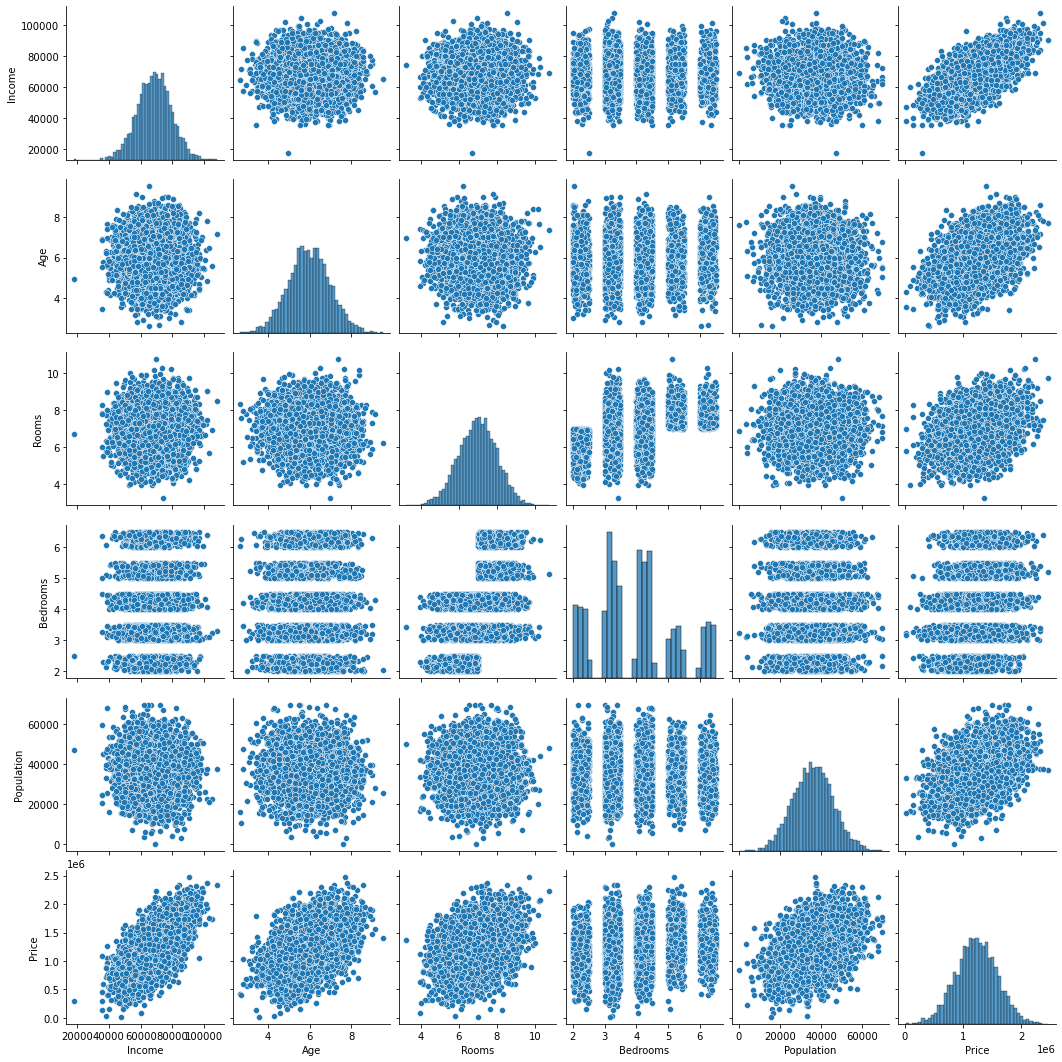

In [3]:
#let's explore the correlations of all numeric columns
#what variables seem most strongly correlated?
sns.pairplot(housing_df)

<AxesSubplot:>

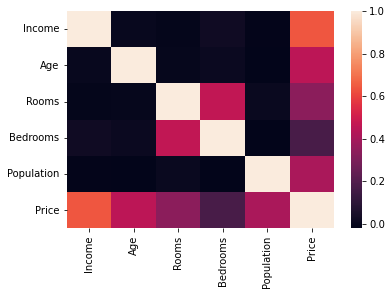

In [4]:
#we can see exact numbers with corr method
#correlation coefficient is an index that ranges from -1 to 1. 
#When the value is 0 it means there is no correlation. 
#Closer to 1 or -1 means higher positive or negative correlation
###Finish command below
kc = housing_df.corr()

#generate heatmap from kc
###enter your code here to generate heatmap
sns.heatmap(kc)

In [5]:
#let's now create a training and test set

###separate x and y variables, first place Price into y
y = housing_df["Price"]

#Drop address from the x variables since it is not a numeric variable, and drop price since it is the y variable
x=housing_df.drop(["Price","Address"],axis=1)


#our model learns from training data and is tested on testing data using sklearn
from sklearn.model_selection import train_test_split

In [6]:
#this splits the data into training and testing data
#random_state=101 ensures that everyone gets the same split data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(3500, 5)
(3500,)
(1500, 5)
(1500,)


In [7]:
#import regression model from sklearn
from sklearn.linear_model import LinearRegression

#initialize the model
lm = LinearRegression()

#fitting the model (or training it)
lm.fit(x_train,y_train)

#print the intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
print (lm.coef_.tolist())



-2641372.667263154
[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]
[21.61763498844076, 165221.1198719091, 121405.37659452522, 1318.7187814659287, 15.2251955120854]


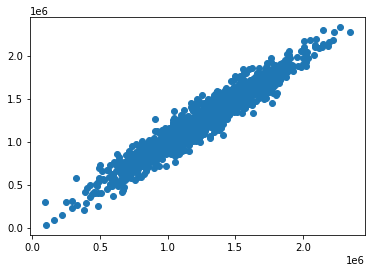

In [8]:
#the corresponding variable names
x.columns

#predicted values
predictions = lm.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(predictions, y_test)

In [9]:
#import more functionality from sklearn
from sklearn.metrics import r2_score

#the R-squared value
r2_score(y_test, predictions)

#Adjusted R-squared?
adjusted_r = 1 - (1-lm.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(adjusted_r)

0.9176464299792525
